In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import matplotlib.font_manager as font_manager
from os.path import expanduser
import matplotlib as mpl
# fontpath = expanduser("/Users/aneeshr/Library/Fonts/LinLibertine_aS.ttf")
# prop = font_manager.FontProperties(fname=fontpath)
# mpl.rcParams['font.family'] = prop.get_name()
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams.update({'font.size': 18})

fontpath = expanduser("/mnt/c/Windows/Fonts/LinLibertine_aS.ttf")
prop = font_manager.FontProperties(fname=fontpath)
# mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = 'r\usepackage{libertine}'
new_rc_params = {
    'text.usetex':True,
#     'figure.dpi':80,
#     'text.latex.preamble':r'\usepackage{libertine}',
    'font.size':14,
    'font.family':'Linux Libertine'
}
mpl.rcParams.update(new_rc_params)
# mpl.rcParams.update({'font.size': 14})

In [3]:
def plot_bars(series1, series2, series3, x_vals, series1_lbl, series2_lbl, series3_lbl, exp_type, plot_name, show_legend=False, plt_text=""):
    N = len(series1)
    ind = np.arange(N) 
    width = 0.25       
    plt.bar(ind, series1, width, label=series1_lbl,color='#EE6363')
    plt.bar(ind + width, series2, width,
        label=series2_lbl,color="#009ACD")
    plt.bar(ind + width + width, series3, width,
        label=series3_lbl,color="#A2CD5A")
    if exp_type=="Insert":
        plt.ylim(0,14)
        text_height=12.25
        plt.yticks(np.arange(0, 14, 3), fontsize=22)
    else:
        plt.ylim(0,5.5)
        text_height=4.8
        plt.yticks(fontsize=22)
    plt.text(N-1+0.25, text_height, plt_text, ha='center', va='bottom', fontsize=22, fontweight='bold')
    plt.xticks(ind, x_vals, fontsize=22)
#     plt.yticks(fontsize=22)
    
    plt.xlabel("K(\%)", fontsize=22)
    plt.ylabel("Latency per " + exp_type + "($\mu$s)", fontsize=22)
    if show_legend:
        plt.legend(bbox_to_anchor=(0, 1.02), loc='upper left',frameon=False, ncol=1, columnspacing=0.5, handletextpad=0.5, labelspacing=0.2, fontsize=22)
    plt.tight_layout()
#     plt.show()
#     plot_name = exp_type+"-"+series1_lbl+"-"+series2_lbl+"_"+l_percentage+".png"
    plt.savefig("./new_plots/"+plot_name+".pdf")
    plt.show()
    plt.close()

In [4]:
x_s = [0,1,5,10,25,50]

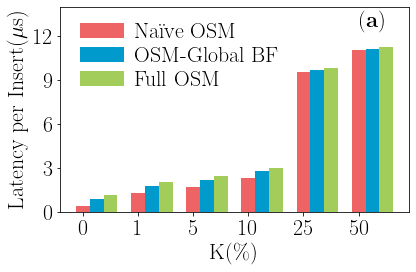

In [6]:
osm_simple_inserts = [452.02, 1314.28, 1748.12, 2363.77, 9561.08, 11062.39]
osm_gbf_inserts = [937.20, 1791.37, 2209.28, 2811.32, 9694.07, 11144.04]
osm_full_inserts = [1192.30, 2070.43, 2467.63, 3045.86, 9862.72, 11258.41]

osm_simple_inserts = np.divide(osm_simple_inserts,1000.0)
osm_gbf_inserts = np.divide(osm_gbf_inserts,1000.0)
osm_full_inserts = np.divide(osm_full_inserts,1000.0)
plot_bars(osm_simple_inserts, osm_gbf_inserts, osm_full_inserts, x_s, "Naïve OSM", "OSM-GBF", "Full OSM", "Insert", "osm-variations-inserts", True, plt_text=r"$\mathbf{(a)}$")

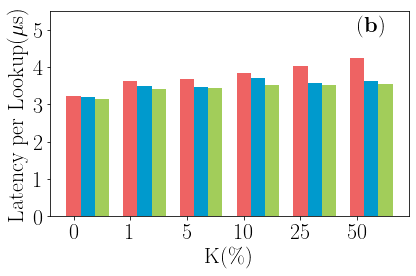

In [52]:
osm_simple_queries = [3229, 3617.70, 3680.00, 3852.84, 4017.54, 4229.59]
osm_gbf_queries = [3193.91, 3490.27, 3458.37, 3695.71, 3562.23, 3614.37]
osm_full_queries = [3150.37, 3401.62, 3437.73, 3522.71, 3517.83, 3537.70]

osm_simple_queries = np.divide(osm_simple_queries,1000.0)
osm_gbf_queries = np.divide(osm_gbf_queries,1000.0)
osm_full_queries = np.divide(osm_full_queries,1000.0)

plot_bars(osm_simple_queries, osm_gbf_queries, osm_full_queries, x_s, "OSM Tree w/o BFs", "OSM Tree w. Global BF", "OSM Tree w. GBF + PageBFs", "Lookup", "osm-variations-queries", False, plt_text=r"$\mathbf{(b)}$")